# Redes Complejas 

## Trabajo Práctico 1

In [1]:
# Imports

import networkx as nx
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
sns.set_palette('dark')

### `dolphin.net`

Los gráficos y los datos los voy a hacer esta vez con Gephi, para probar la herramienta... Dejo los resultados y los gráficos en el notebook.

#### (a) Representación del grafo

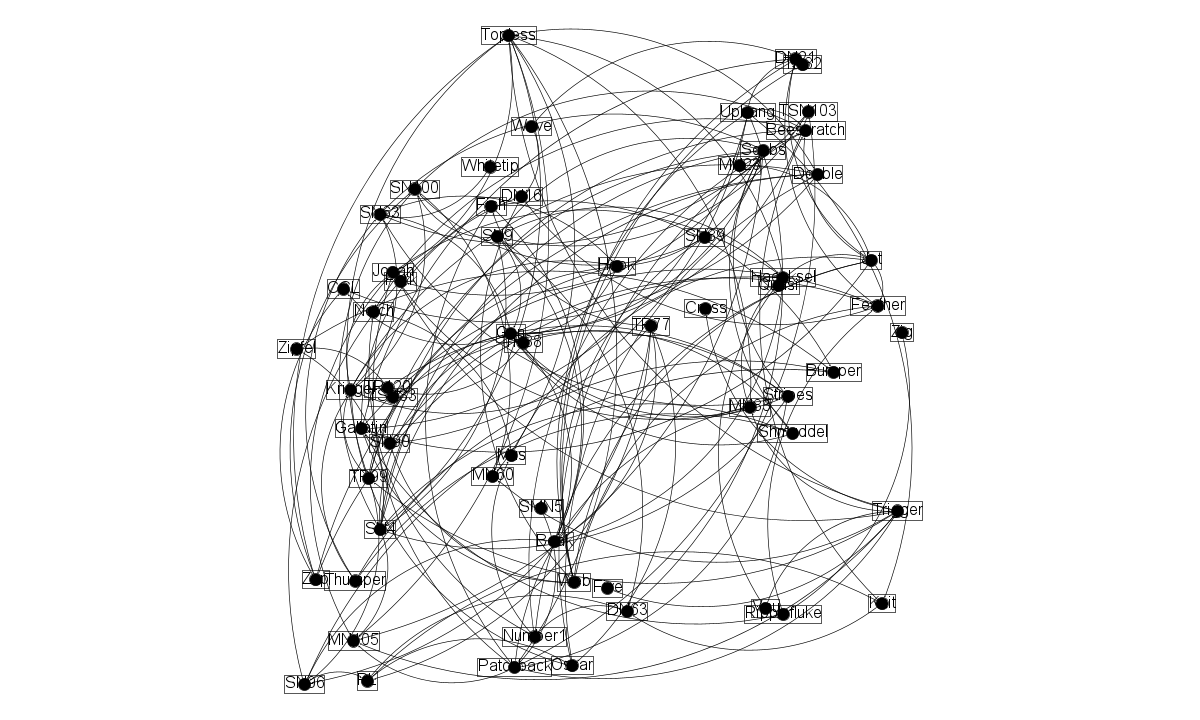

#### (b) GCC 

Haciendo búsquedas, Gephi nos deja pintar dentro del grafo la componente conexa más grande. Los nodos están pintados de gris en el dibujo.

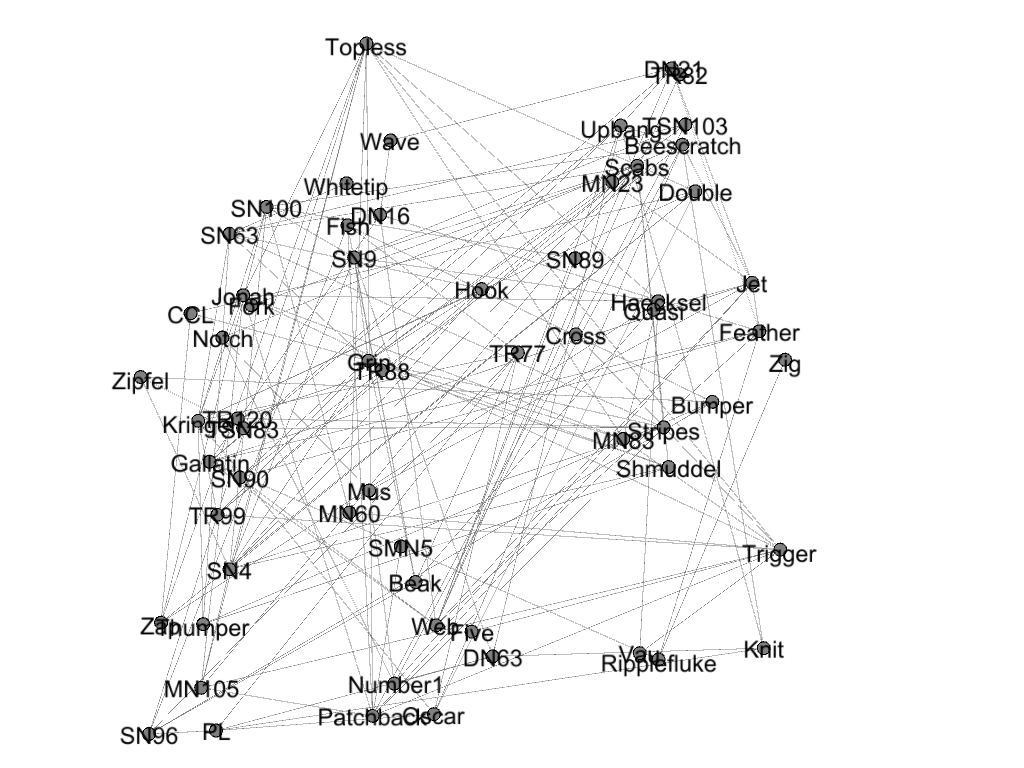

#### (c) Grado, betweenness, closeness máximos

* Degree : Gnn, 12
* Betweenness: SN4, 60.666
* Closeness: Acá hay varios nodos que comparten el mismo nivel de cercanía, 1.0. Dejo screenshot de todos los nodos que comparten la máxima cercanía en el grafo.

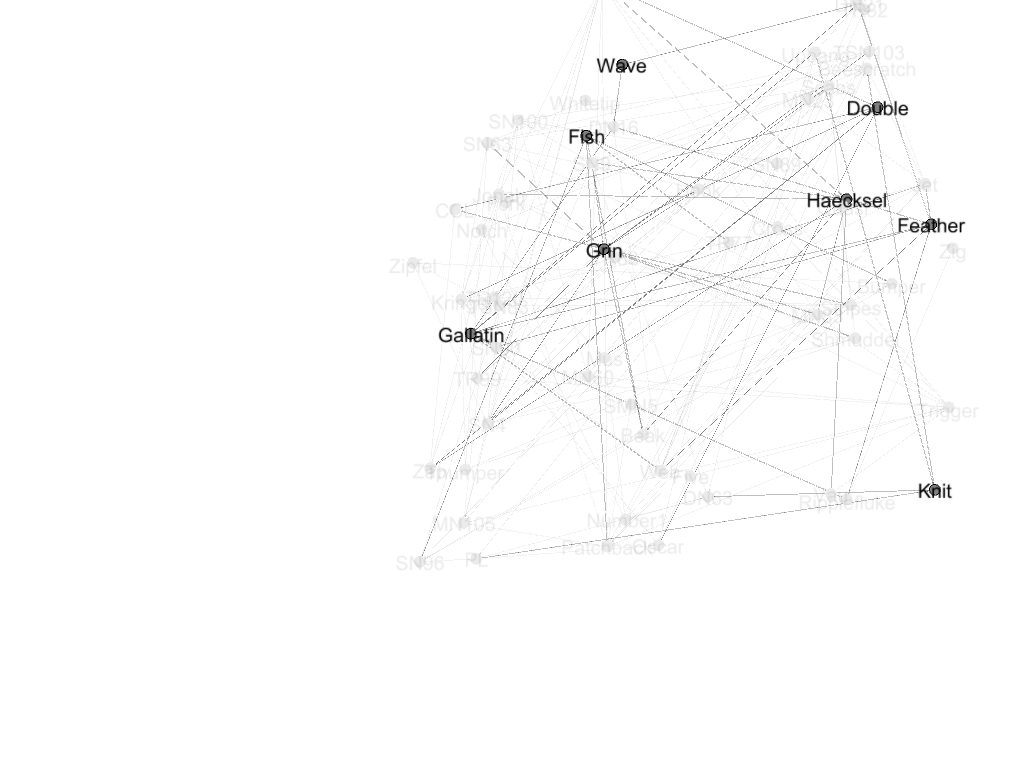

#### (d) Distancia promedio entre nodos

>Average Path length: 2.2068345323741005

#### (e) Comparación gráfica de las tres medidas de centralidad

Para esto si vamos a necesitar levantar los datos con Python

In [2]:
dolphin = nx.read_pajek('datos_tp1/dolphin.net')

In [3]:
degrees = dict(nx.degree(dolphin))
betweenness = nx.betweenness_centrality(dolphin)
closeness = nx.closeness_centrality(dolphin)

centrality_data = {}
for node in list(dolphin.nodes):
    dg = degrees[node]
    btw = betweenness[node]
    close = closeness[node]
    results = {'Degree':dg,
              'Betweenness':btw,
              'Closeness':close}
    centrality_data[node] = results

df = pd.DataFrame(centrality_data).transpose()

NetworkXNotImplemented: not implemented for multigraph type

In [ ]:
fig,axs = plt.subplots(1,3,figsize=(24,8))
df['Degree'].sort_values().plot(kind='bar',title='Degree',ax=axs[0],fontsize=16)
df['Betweenness'].sort_values().plot(kind='bar',title='Betwweenness',ax=axs[1],fontsize=16)
df['Closeness'].sort_values().plot(kind='bar',title='Closeness',ax=axs[2],fontsize=16)
plt.tight_layout()

In [ ]:
# Correlaciones

fig, axs = plt.subplots(1,3,figsize=(24,8))

axs[0].plot(df['Degree'],df['Betweenness'],'o',markersize=8)
axs[1].plot(df['Degree'],df['Closeness'],'o',markersize=8)
axs[2].plot(df['Betweenness'],df['Closeness'],'o',markersize=8)

axs[0].set_xlabel('Degree',fontsize=20)
axs[1].set_xlabel('Degree',fontsize=20)
axs[2].set_xlabel('Betweenness',fontsize=20)

axs[0].set_ylabel('Betweenness',fontsize=20)
axs[1].set_ylabel('Closeness',fontsize=20)
axs[2].set_ylabel('Closeness',fontsize=20)

axs[0].tick_params(axis='both', which='major', labelsize=16)
axs[1].tick_params(axis='both', which='major', labelsize=16)
axs[2].tick_params(axis='both', which='major', labelsize=16)

axs[0].grid()
axs[1].grid()
axs[2].grid()

#### (f) Distribución de grado lineal y log-log

In [ ]:
fig,axs = plt.subplots(2,1,figsize=(10,10))

axs[0].hist(df['Degree'],bins=12,density=True,histtype='step',linewidth=2)
axs[1].hist(df['Degree'],bins=12,density=True,histtype='step',linewidth=2)
axs[1].set_yscale('log')
axs[1].set_xscale('log')

axs[1].set_xlabel('Degree',fontsize=16)
axs[0].set_ylabel('Relative freq.',fontsize=16)
axs[1].set_ylabel('Relative freq.',fontsize=16)

#### (g) Representación con Gephi de los nodos

En Gephi se pueden colorear los nodos de acuerdo a algún atributo, y con un código de colores. Lamentablemente no nos deja agregar barras para identificar los colores con los valores numéricos, pero por lo menos sirve cualitativamente. En estos gráficos, los colores van desde azul (menor valor) a rojo (mayor valor), para representar los nodos con mayor grado, betweenness y closeness.

##### Grado
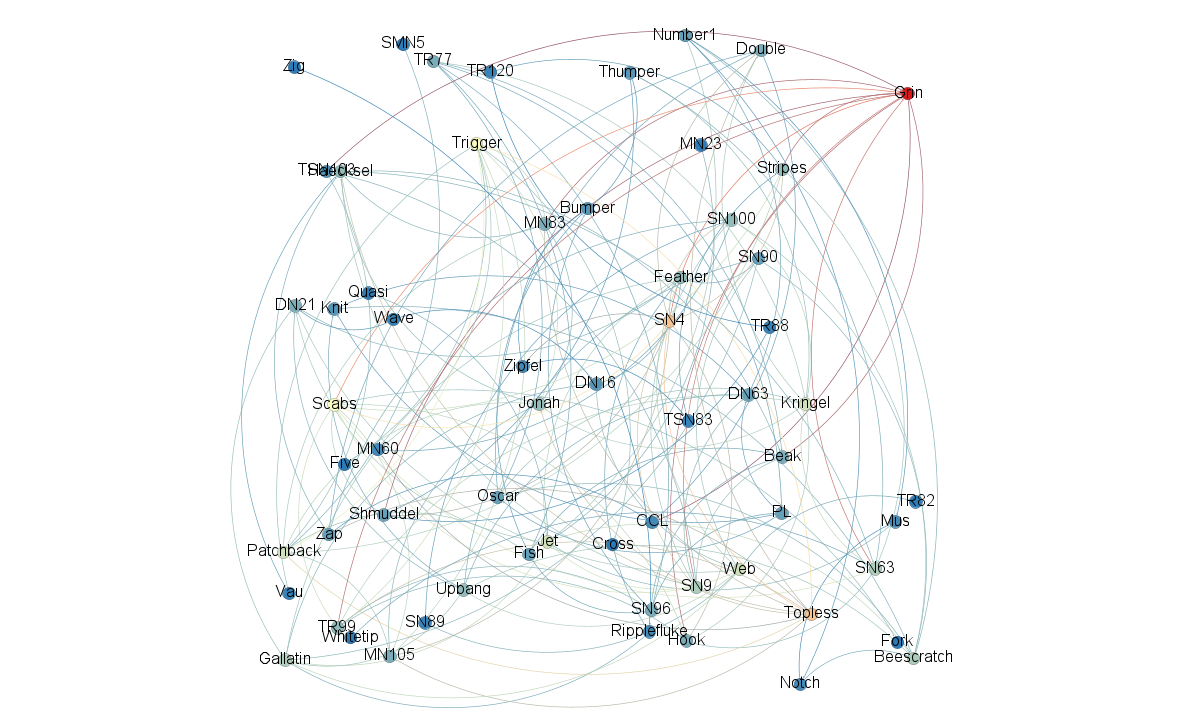

##### Betweenness
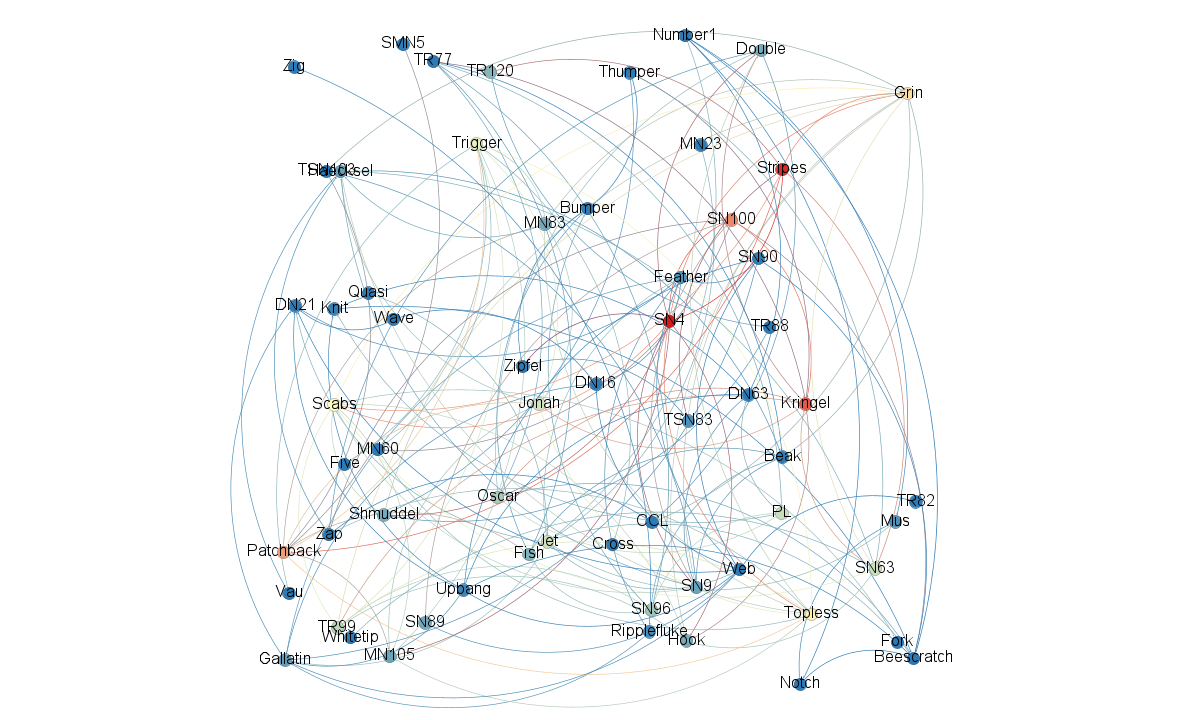

##### Closeness

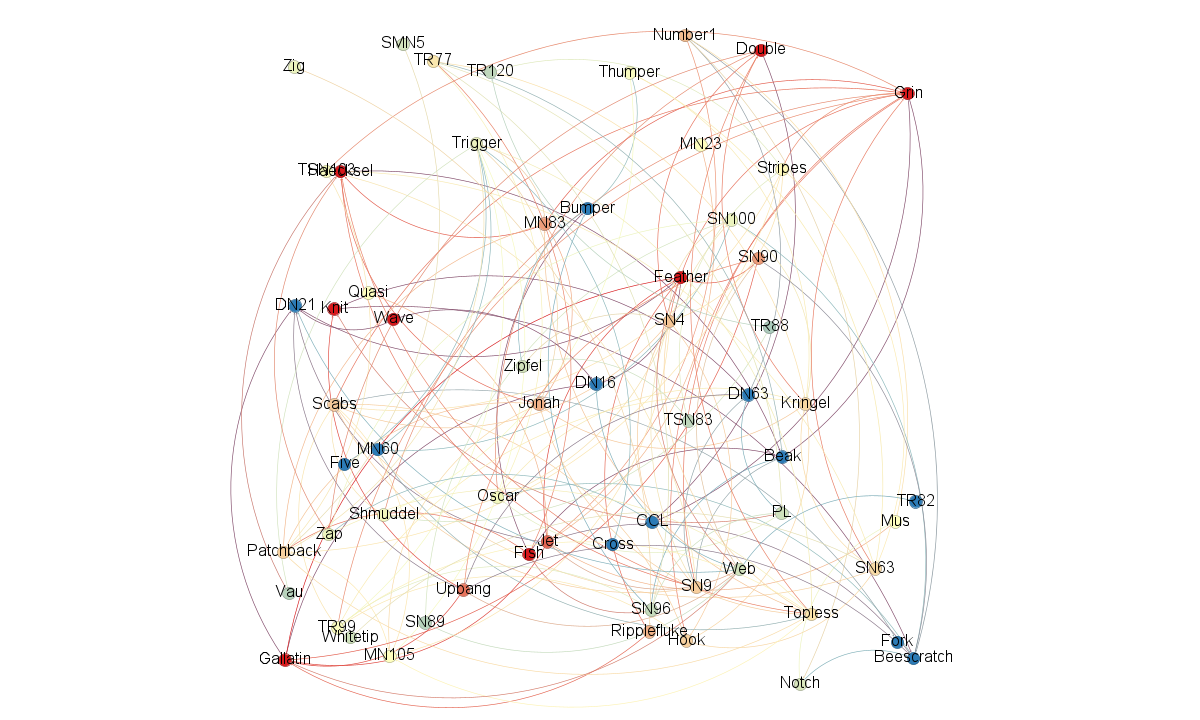